 Compulsory Task I

 Follow these steps:  
 ● Create a Decision Tree that can predict the survival of passengers on the Titanic Make sure not to impose any restrictions on the depth of the tree.  
 ● Use the decision_tree_titanic.ipynb file provided, which has the  titanic.csv dataset loaded to complete the task.  
 ● Select relevant variables from the data and split the data into a training, development, and test set.  
 ● Train a decision tree and make a plot to fit.  
 ● Compute your model’s accuracy on the development set.  
 ● Try building your model with different values of the max_depth[2-10]. At each step, create a plot of your tree and store the accuracies on both the training and development data.  
 ● Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means.  
 ● Report the accuracy of your final model on the test data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import Image  
import pydot

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype=int)
titanic_df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare Embarked  \
0            1         0       3  22.0      1      0   7.2500        S   
1            2         1       1  38.0      1      0  71.2833        C   
2            3         1       3  26.0      0      0   7.9250        S   
3            4         1       1  35.0      1      0  53.1000        S   
4            5         0       3  35.0      0      0   8.0500        S   

   Sex_female  Sex_male  
0           0         1  
1           1         0  
2           1         0  
3           1         0  
4           0         1

Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype=int)
titanic_df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500           0   
1            2         1       1  38.0      1      0  71.2833           1   
2            3         1       3  26.0      0      0   7.9250           1   
3            4         1       1  35.0      1      0  53.1000           1   
4            5         0       3  35.0      0      0   8.0500           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  
3         0           0           0           1  
4         1           0           0           1

In [8]:
# Check the correlations.
titanic_df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Sex_female     -0.042939  0.543351 -0.131900 -0.093254  0.114631  0.245489   
Sex_male        0.042939 -0.543351  0.131900  0.093254 -0.114631 -0.245489   
Embarked_C     -0.001205  0.168240 -0.243292  0.036261 -0.059528 -0.011069   
Embarked_Q     -0.033606  0.003650  0.221009 -0.022405 -0.026354 -0.081228   
Embarked_S      0.022148 -0.155660  0.081720 -0.032523  0.070941  0.063036   

                 Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
PassengerId  0.012658   -0.042939  0.042939   -0.001205   -0.033606   
Survived     0.257307    0.543351 -0.543351    0.168240    0.003650   
Pclass      -0.549500   -0.131900  0.131900   -0.243292    0.221009   
Age          0.096067   -0.093254  0.093254    0.036261   -0.022405   
SibSp        0.159651    0.114631 -0.114631   -0.059528   -0.026354   
Parch        0.216225    0.245489 -0.245489   -0.011069   -0.081228   
Fare         1.000000    0.182333 -0.182333    0.269335   -0.117216   
Sex_female   0.182333    1.000000 -1.000000    0.082853    0.074115   
Sex_male    -0.182333   -1.000000  1.000000   -0.082853   -0.074115   
Embarked_C   0.269335    0.082853 -0.082853    1.000000   -0.148258   
Embarked_Q  -0.117216    0.074115 -0.074115   -0.148258    1.000000   
Embarked_S  -0.166603   -0.125722  0.125722   -0.778359   -0.496624   

             Embarked_S  
PassengerId    0.022148  
Survived      -0.155660  
Pclass         0.081720  
Age           -0.032523  
SibSp          0.070941  
Parch          0.063036  
Fare          -0.166603  
Sex_female    -0.125722  
Sex_male       0.125722  
Embarked_C    -0.778359  
Embarked_Q    -0.496624  
Embarked_S     1.000000

<Axes: >

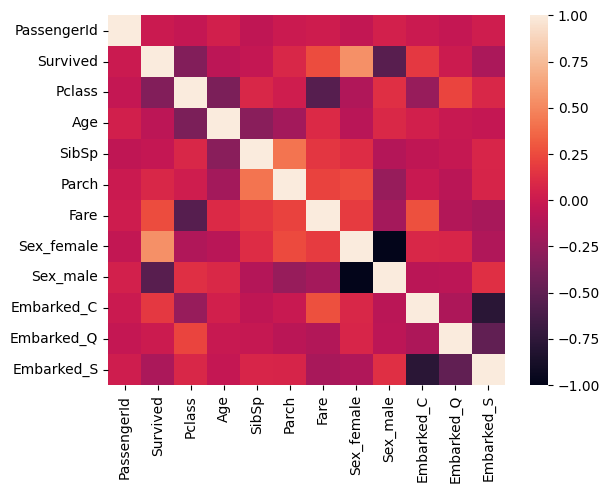

In [9]:
# Check heatmap as well for easy visibility.
sns.heatmap(titanic_df.corr())

I expect the following variables to be relevant:  

independent variables:  
- sex (high correlation - it is well known that women and children usually get saved first)  
- passenger class (moderate correlation - it is possible that higher classes had more access to life boats)  
- fare ( some correlation with survival - (however: high correlation with class but less correlation with survived. It is very likely influenced by the class) )  
- embarked (weak correlation but bigger than others - possible that passengers had already disembarked if they embarked at an early stop)  
- siblings (low correlation - however, I will still add it to the model) 
- parents and children on board (low correlation - however, I will still add it to the model)  
- age (very low correlation with survival, but I choose it anyways to practice)  

dependent variable:  
- survived

I disregard these variables:  
- passenger ID (should not have any influence on survival)  
- name (should not have influence on survival)  

In [10]:
# Revisit the dataset columns.
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [11]:
# Drop more unneeded columns.
titanic_df.drop("PassengerId", axis=1, inplace=True)

# Revisit the dataset columns.
titanic_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [12]:
# Check for non-values.
titanic_df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [13]:
# For simplicity, drop rows with non-values.
titanic_df.dropna(how='any', inplace = True)
titanic_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [14]:
# Split the independent variables from the dependent variable.
X = titanic_df.iloc[:,1:].values  # Independent variables
y = titanic_df.iloc[:,0].values   # Dependent variable

print(X.shape, type(X))
print(y.shape, type(y))

(714, 10) <class 'numpy.ndarray'>
(714,) <class 'numpy.ndarray'>


In [15]:
# Split the original dataset into training and test sets.
r = 2
X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
                    y, test_size=0.2, random_state=r)

# Split the training set further into training and development sets.
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, 
                    y_train_full, test_size=0.2, random_state=r)

**First model - unpruned**

In [16]:
# Training a model.
first_model = DecisionTreeClassifier(max_depth=None, random_state=r)
first_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

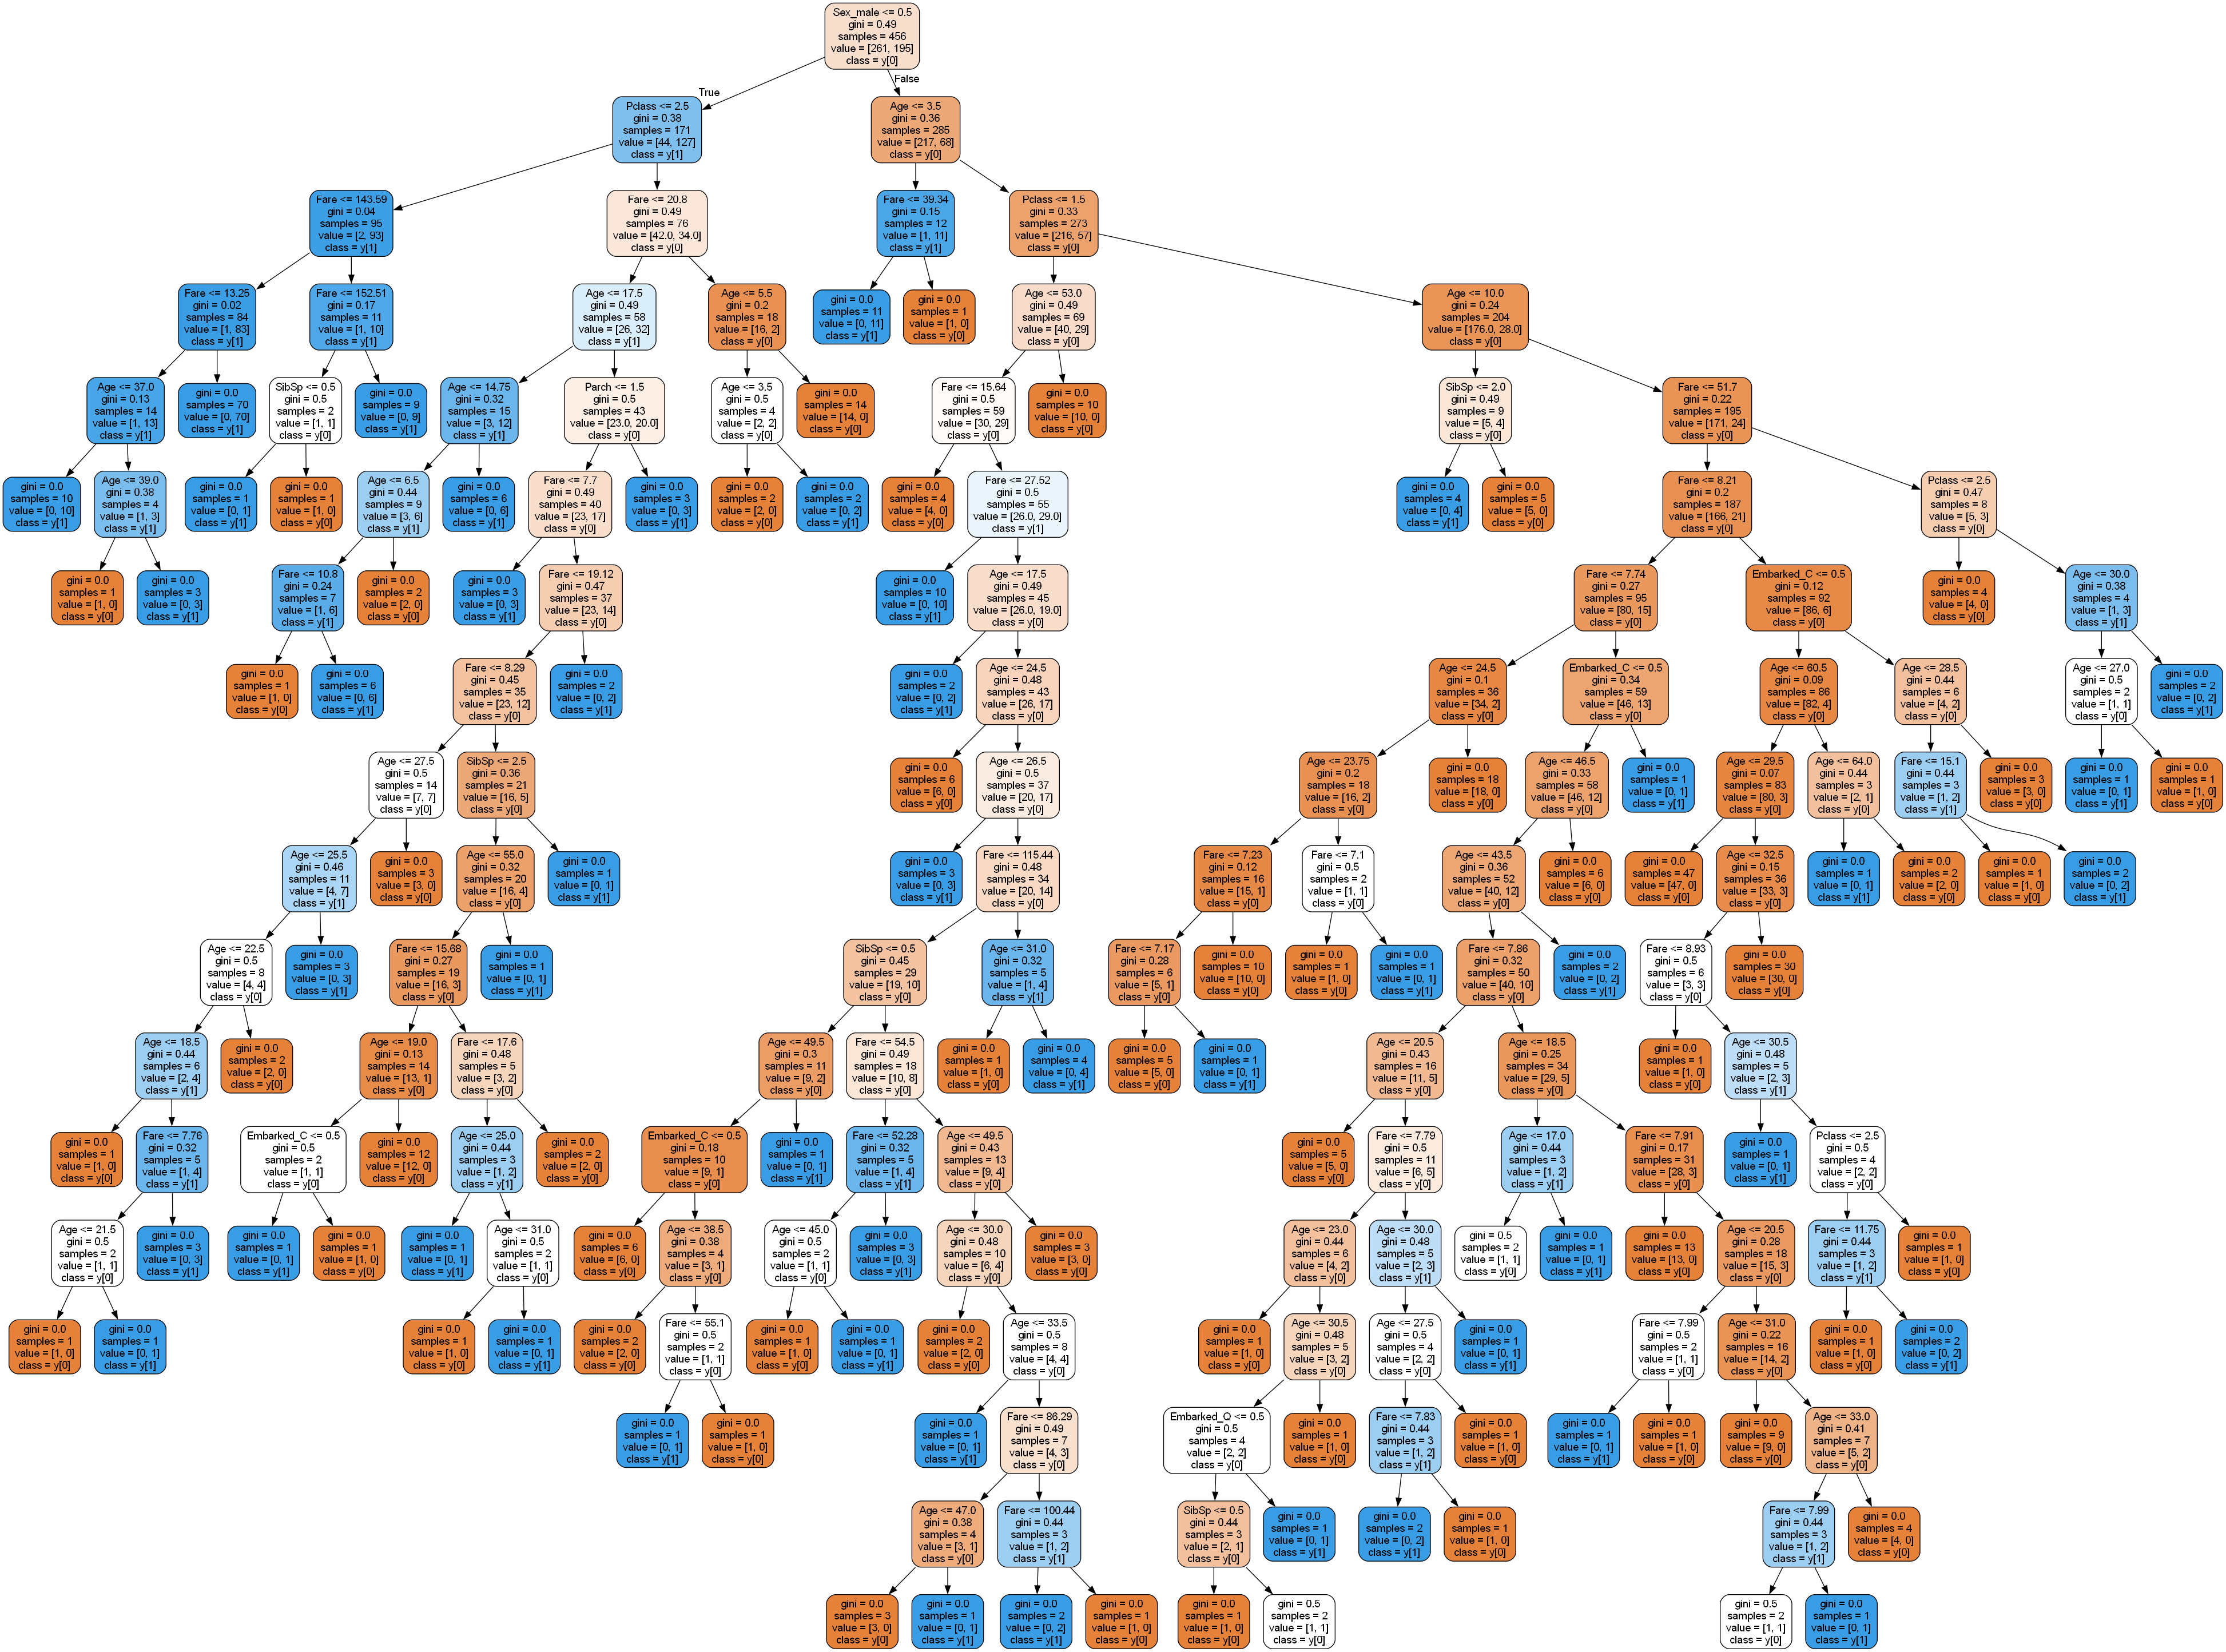

In [17]:
# Plotting the model.

# Set the feature names
Ind_Var = titanic_df.iloc[:,1:]
feature_names = list(Ind_Var.columns)

export_graphviz(first_model, out_file='first_model.dot', feature_names = feature_names, class_names=True,
                rounded = True, proportion = False, precision = 2, filled = True)
graphs = pydot.graph_from_dot_file('first_model.dot')
graph = graphs[0]
graph.write_png('first_model.png')

Image(filename = 'first_model.png', width=1000)

In [18]:
# Computing the performance on the development set.
first_model_depth = first_model.tree_.max_depth
first_model_accuracy = first_model.score(X_dev, y_dev)

print("Accuracy:", first_model_accuracy)
print("At depth:", first_model_depth)

Accuracy: 0.8
At depth: 17


In [19]:
# Create a function that will fit a model for each depth entered.
def model(d):
    model = DecisionTreeClassifier(max_depth=d, random_state=r)
    model.fit(X_train, y_train)
    return model

In [20]:
# Save the models for the desired depths.
depth_2 = model(2)
depth_3 = model(3)
depth_4 = model(4)
depth_5 = model(5)
depth_6 = model(6)
depth_7 = model(7)
depth_8 = model(8)
depth_9 = model(9)
depth_10 = model(10)

In [21]:
# Create a function that will plot a decision tree for each entered model.
def plot(model):
    export_graphviz(model, out_file='model.dot', feature_names = feature_names,
                rounded = True, proportion = False, precision = 2, filled = True)
    graphs = pydot.graph_from_dot_file('model.dot')
    graph = graphs[0]
    graph.write_png('model.png')

**Models for the depths 2-10**

Development set accuracy: 0.8260869565217391
Training set accuracy: 0.793859649122807
At depth: 2


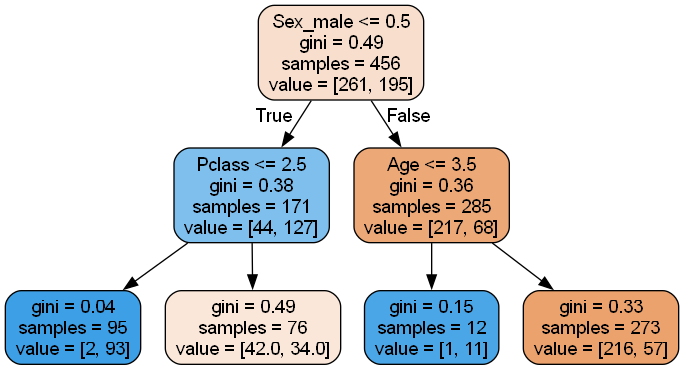

In [22]:
# Choose the current model.
current_model = depth_2

# Computing the performance on the development set.
dev_accuracy_2 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_2 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8347826086956521
Training set accuracy: 0.8092105263157895
At depth: 3


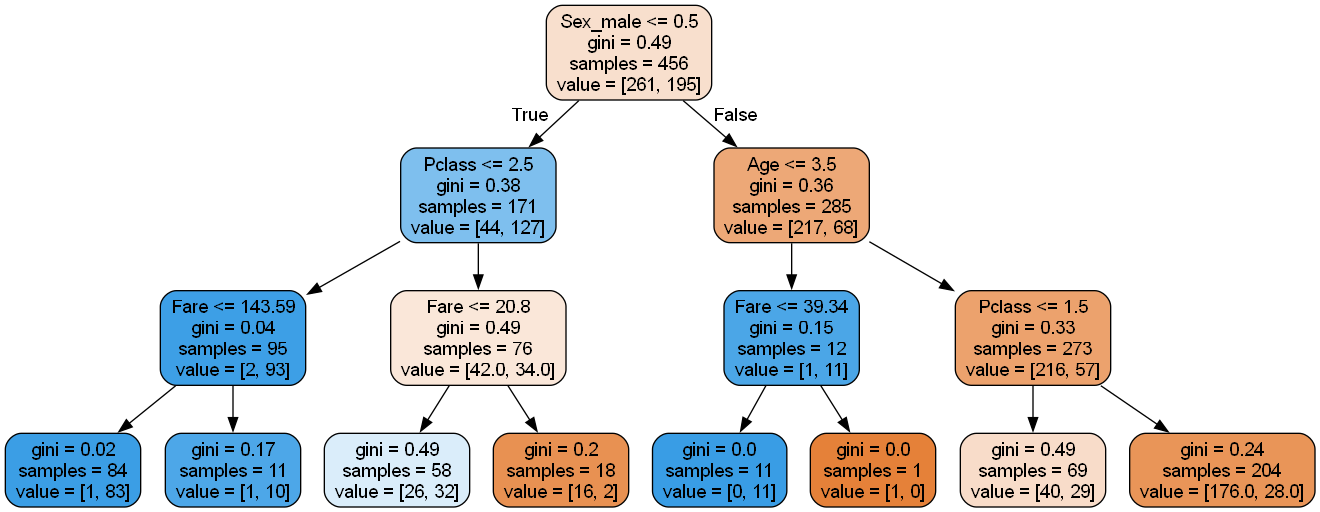

In [23]:
# Choose the current model.
current_model = depth_3

# Computing the performance on the development set.
dev_accuracy_3 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_3 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8260869565217391
Training set accuracy: 0.8157894736842105
At depth: 4


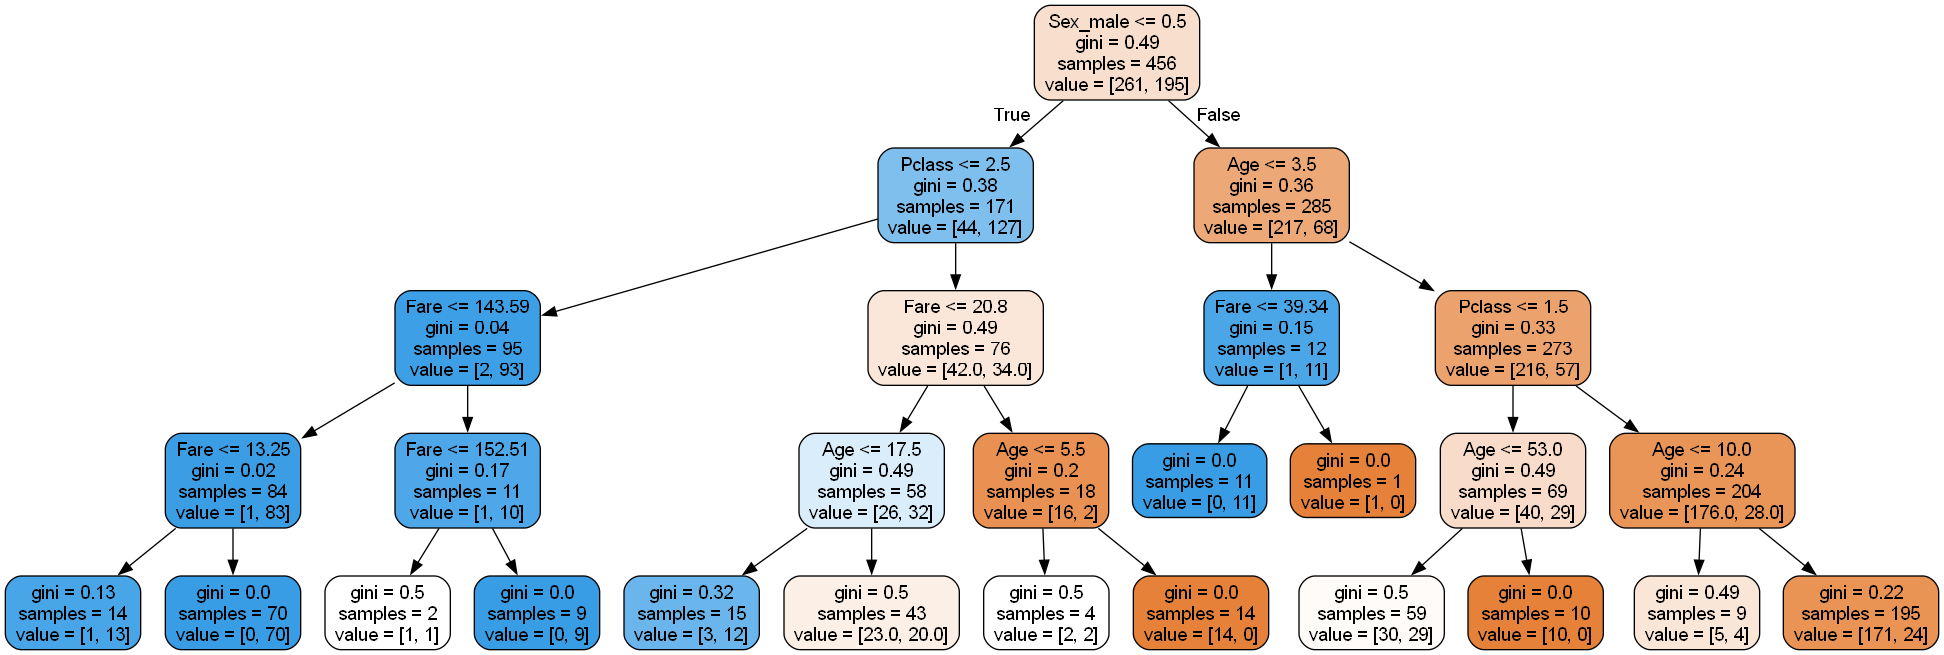

In [24]:
# Choose the current model.
current_model = depth_4

# Computing the performance on the development set.
dev_accuracy_4 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_4 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8347826086956521
Training set accuracy: 0.8442982456140351
At depth: 5


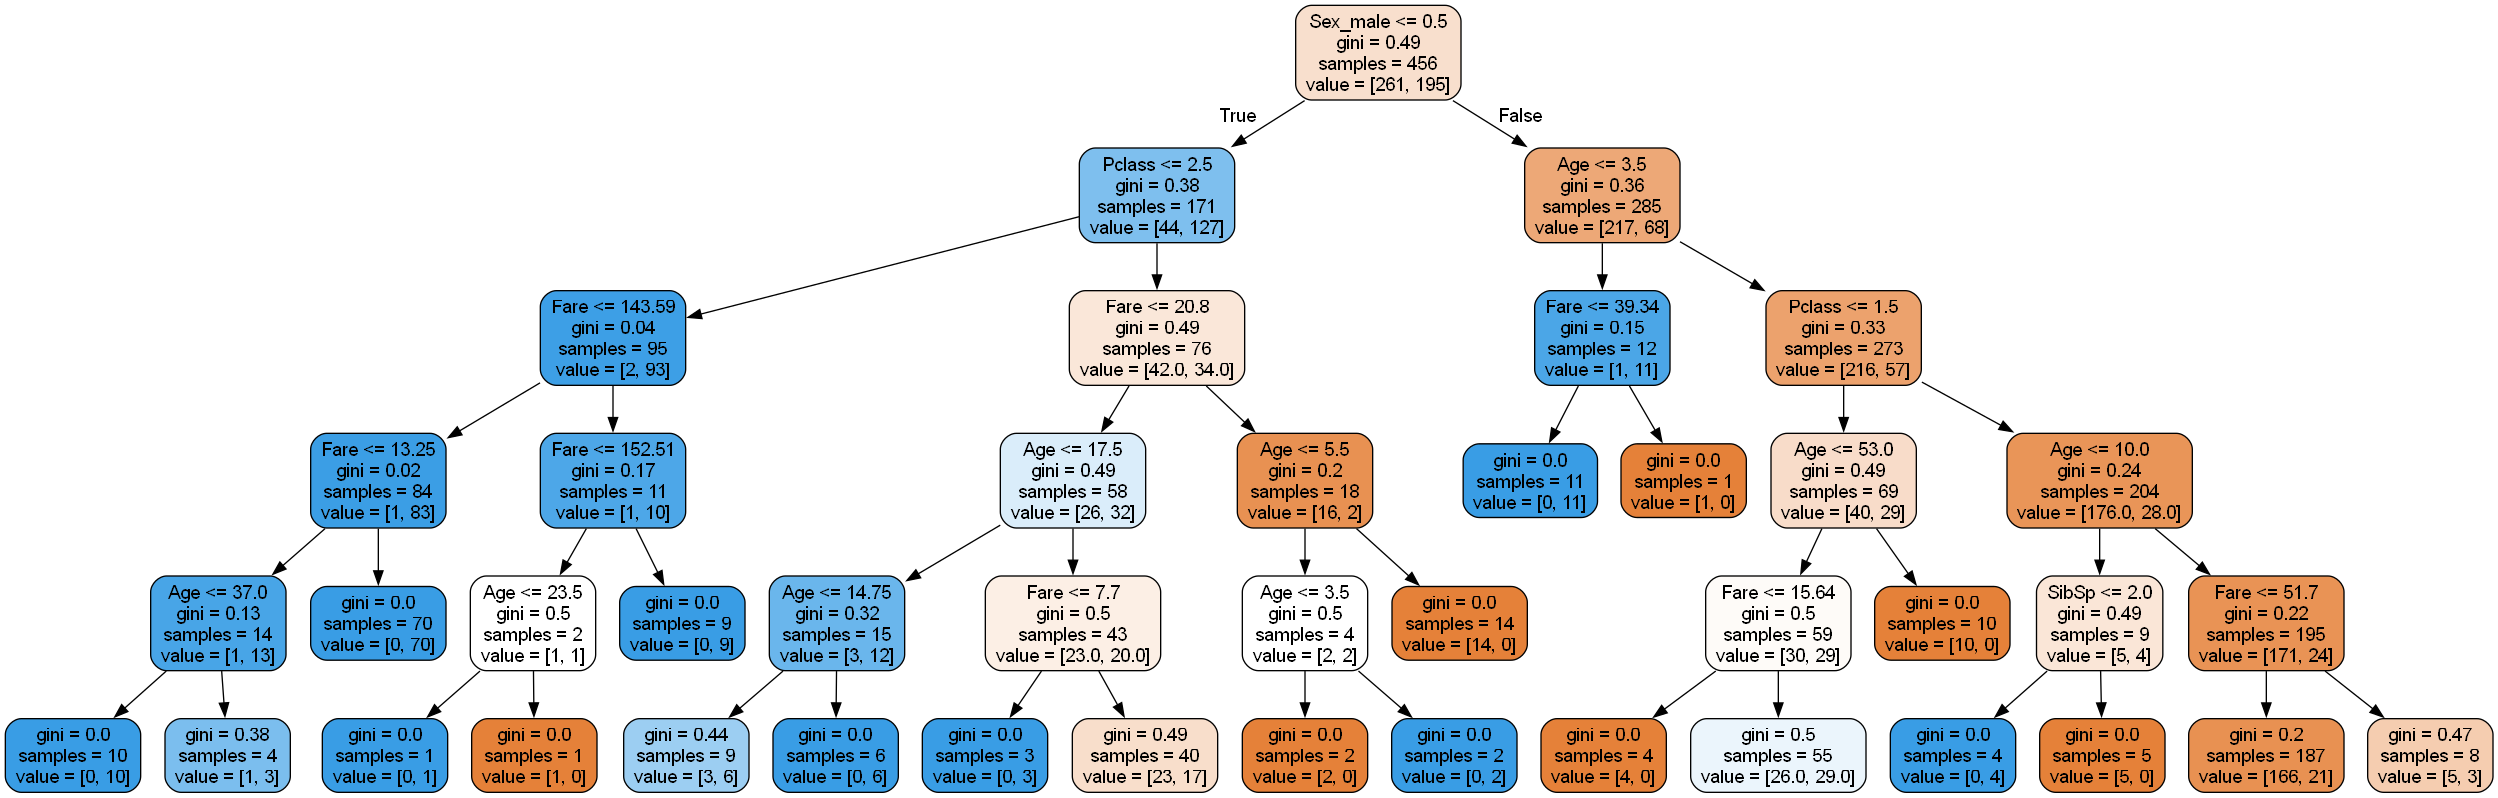

In [25]:
# Choose the current model.
current_model = depth_5

# Computing the performance on the development set.
dev_accuracy_5 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_5 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8347826086956521
Training set accuracy: 0.8771929824561403
At depth: 6


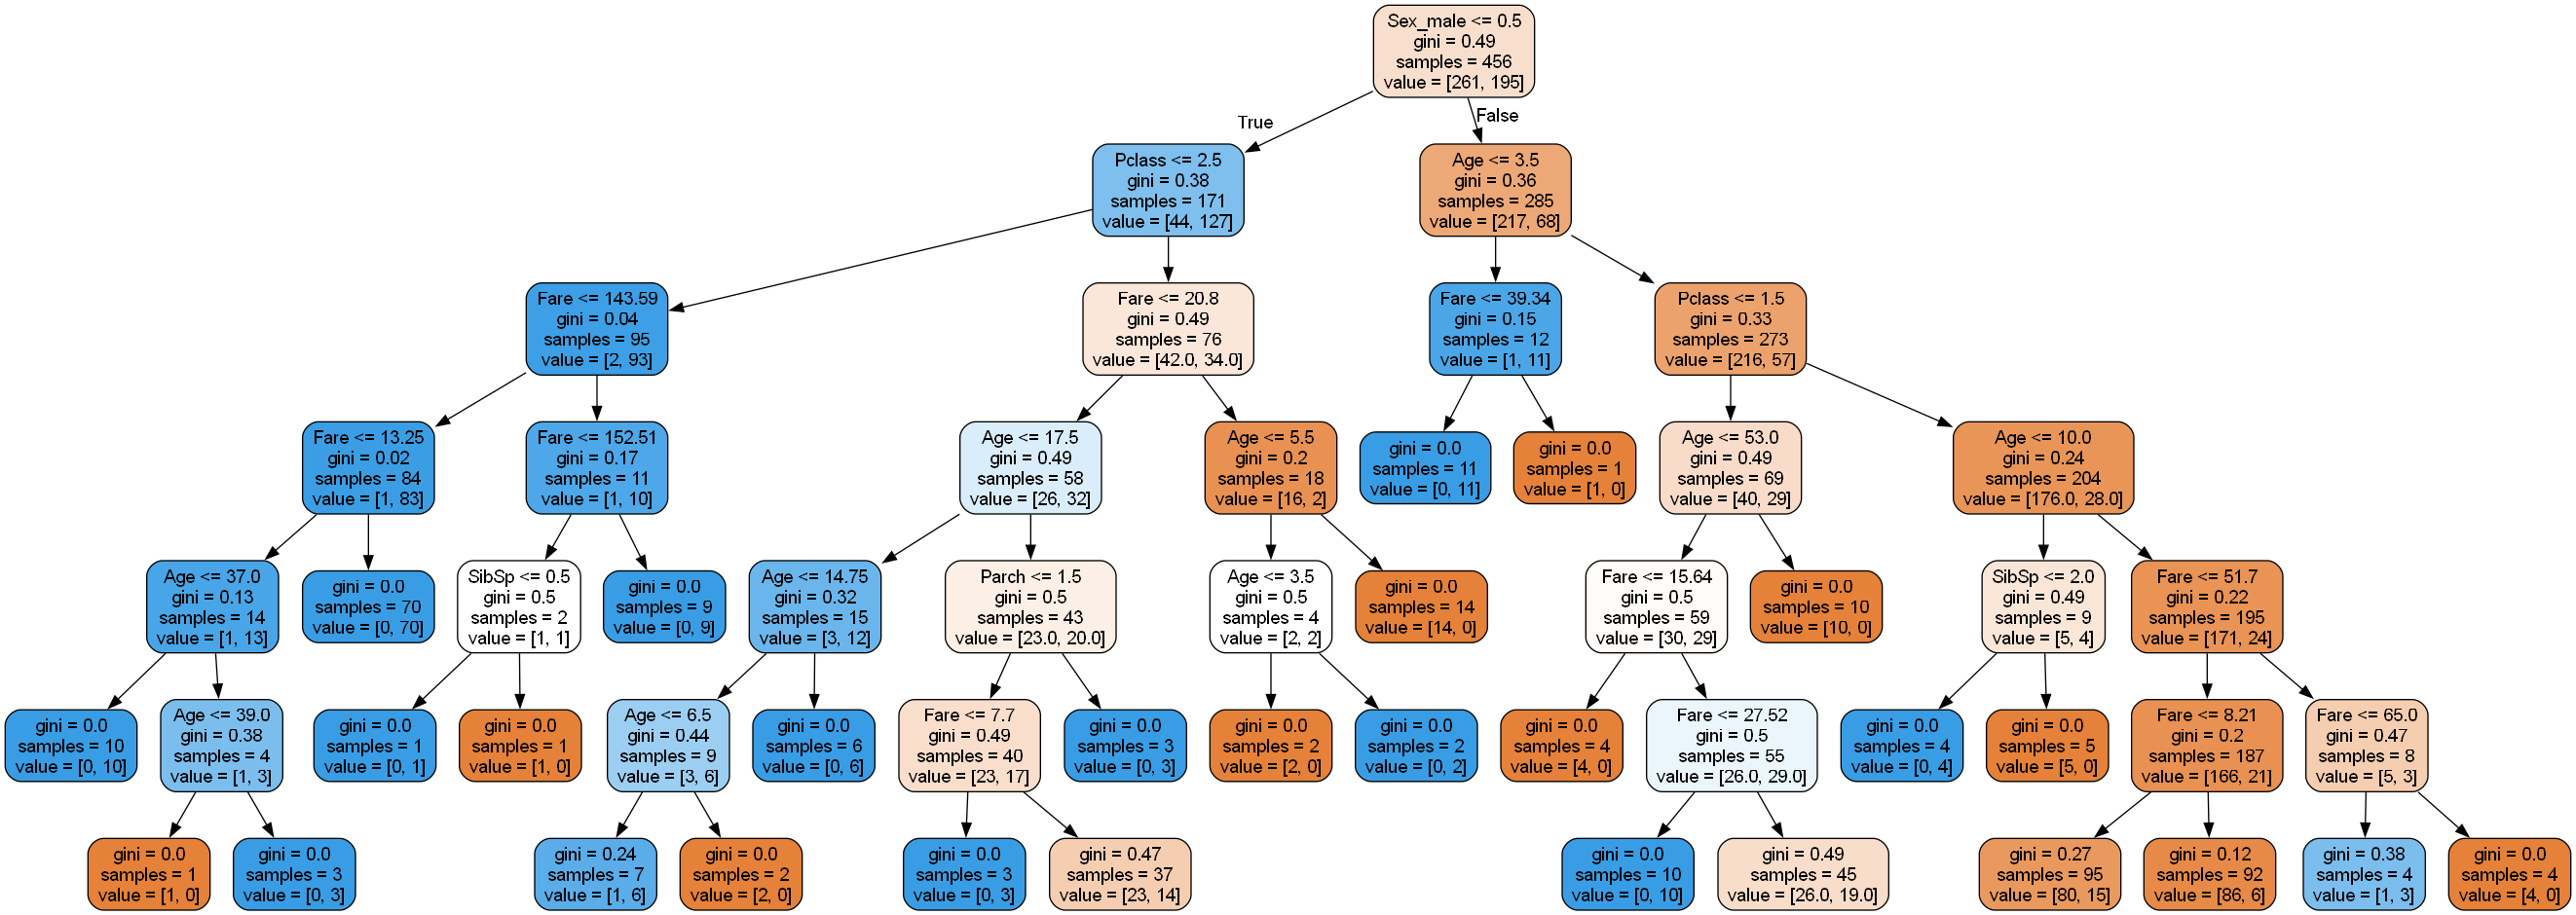

In [26]:
# Choose the current model.
current_model = depth_6

# Computing the performance on the development set.
dev_accuracy_6 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_6 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8434782608695652
Training set accuracy: 0.8881578947368421
At depth: 7


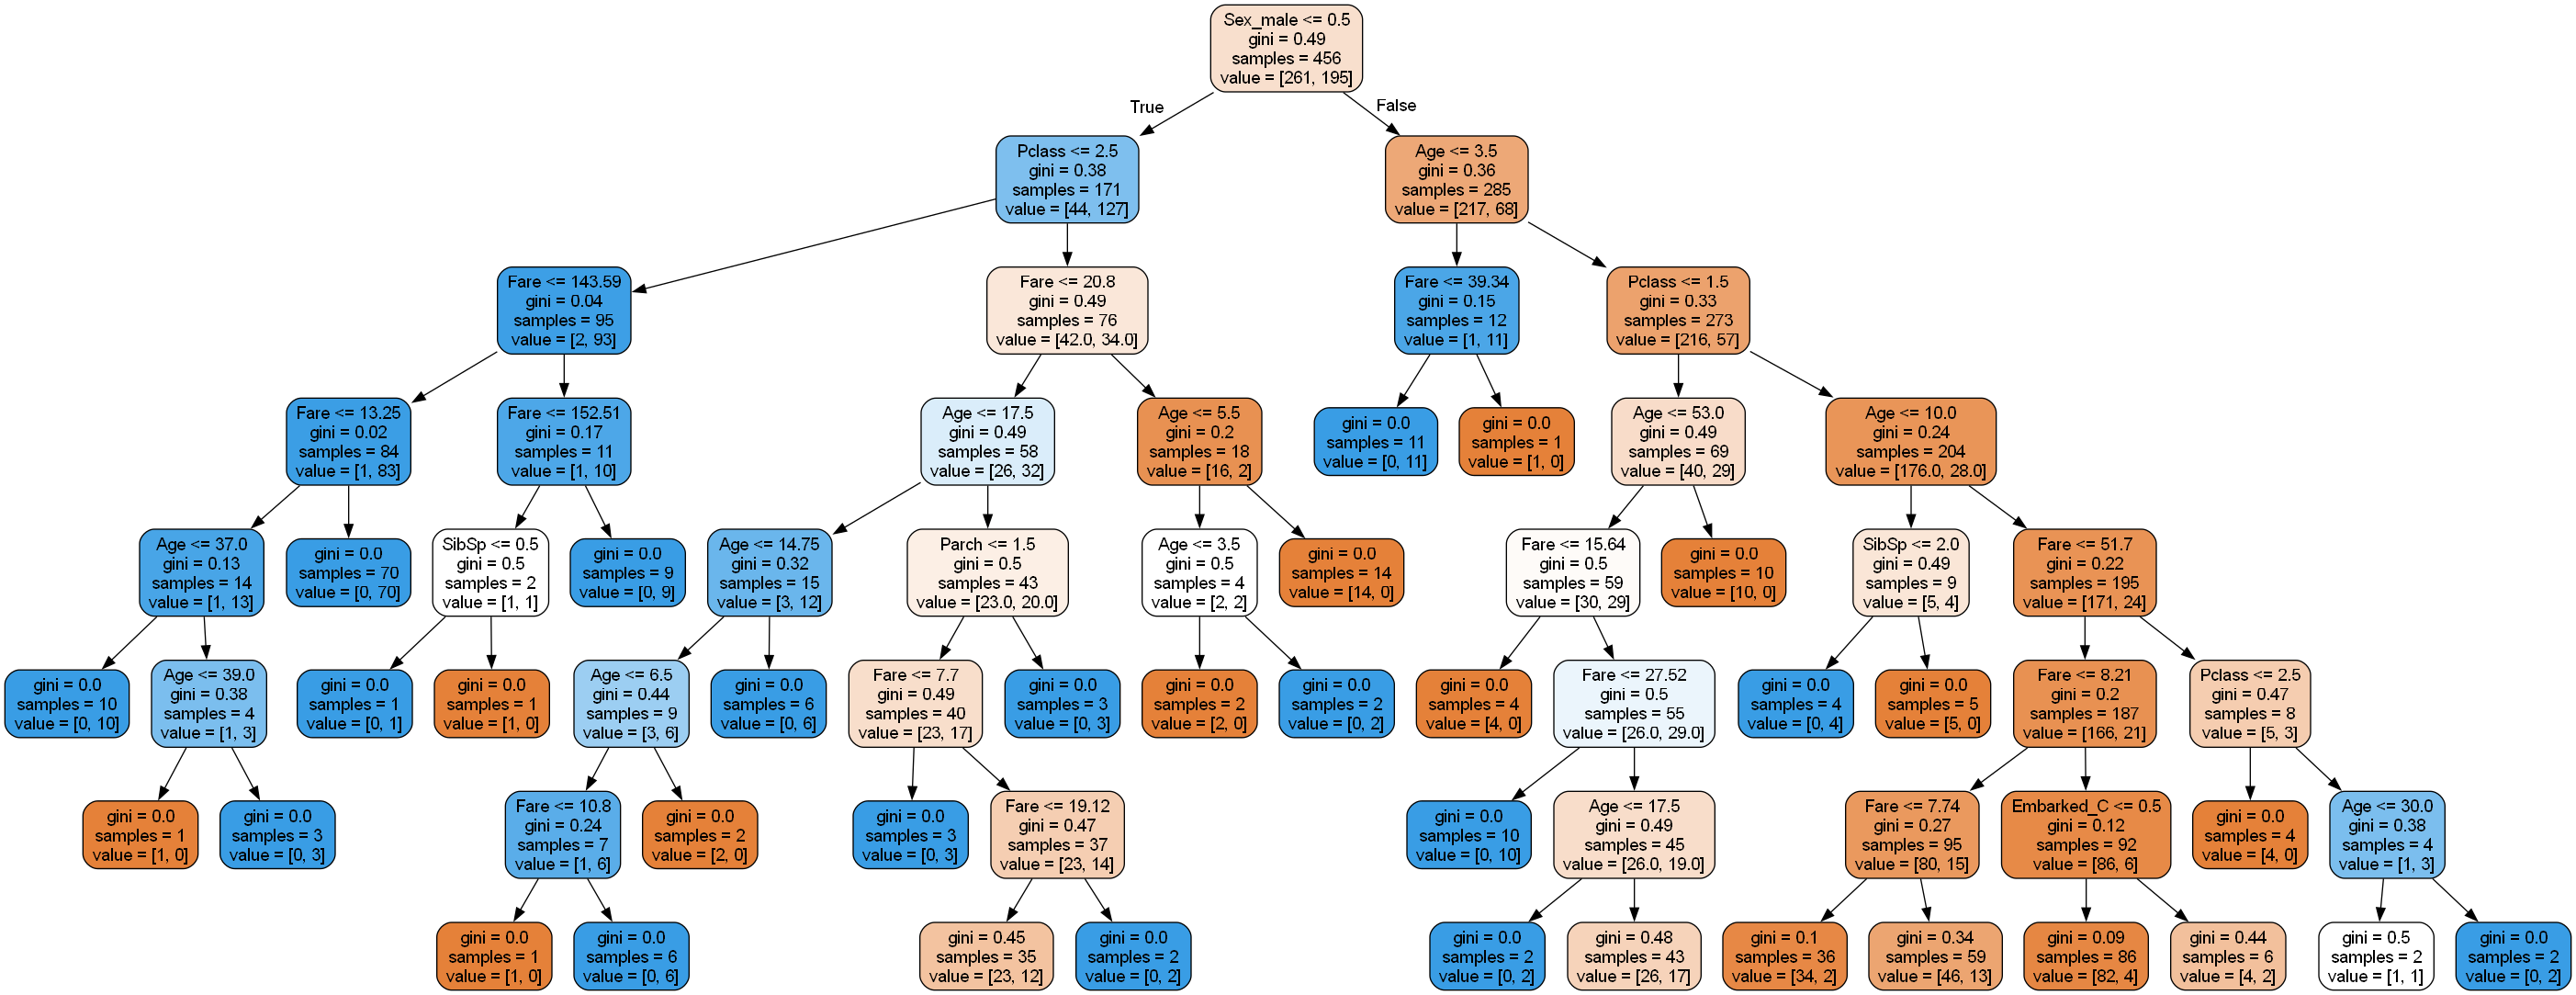

In [27]:
# Choose the current model.
current_model = depth_7

# Computing the performance on the development set.
dev_accuracy_7 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_7 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8347826086956521
Training set accuracy: 0.8991228070175439
At depth: 8


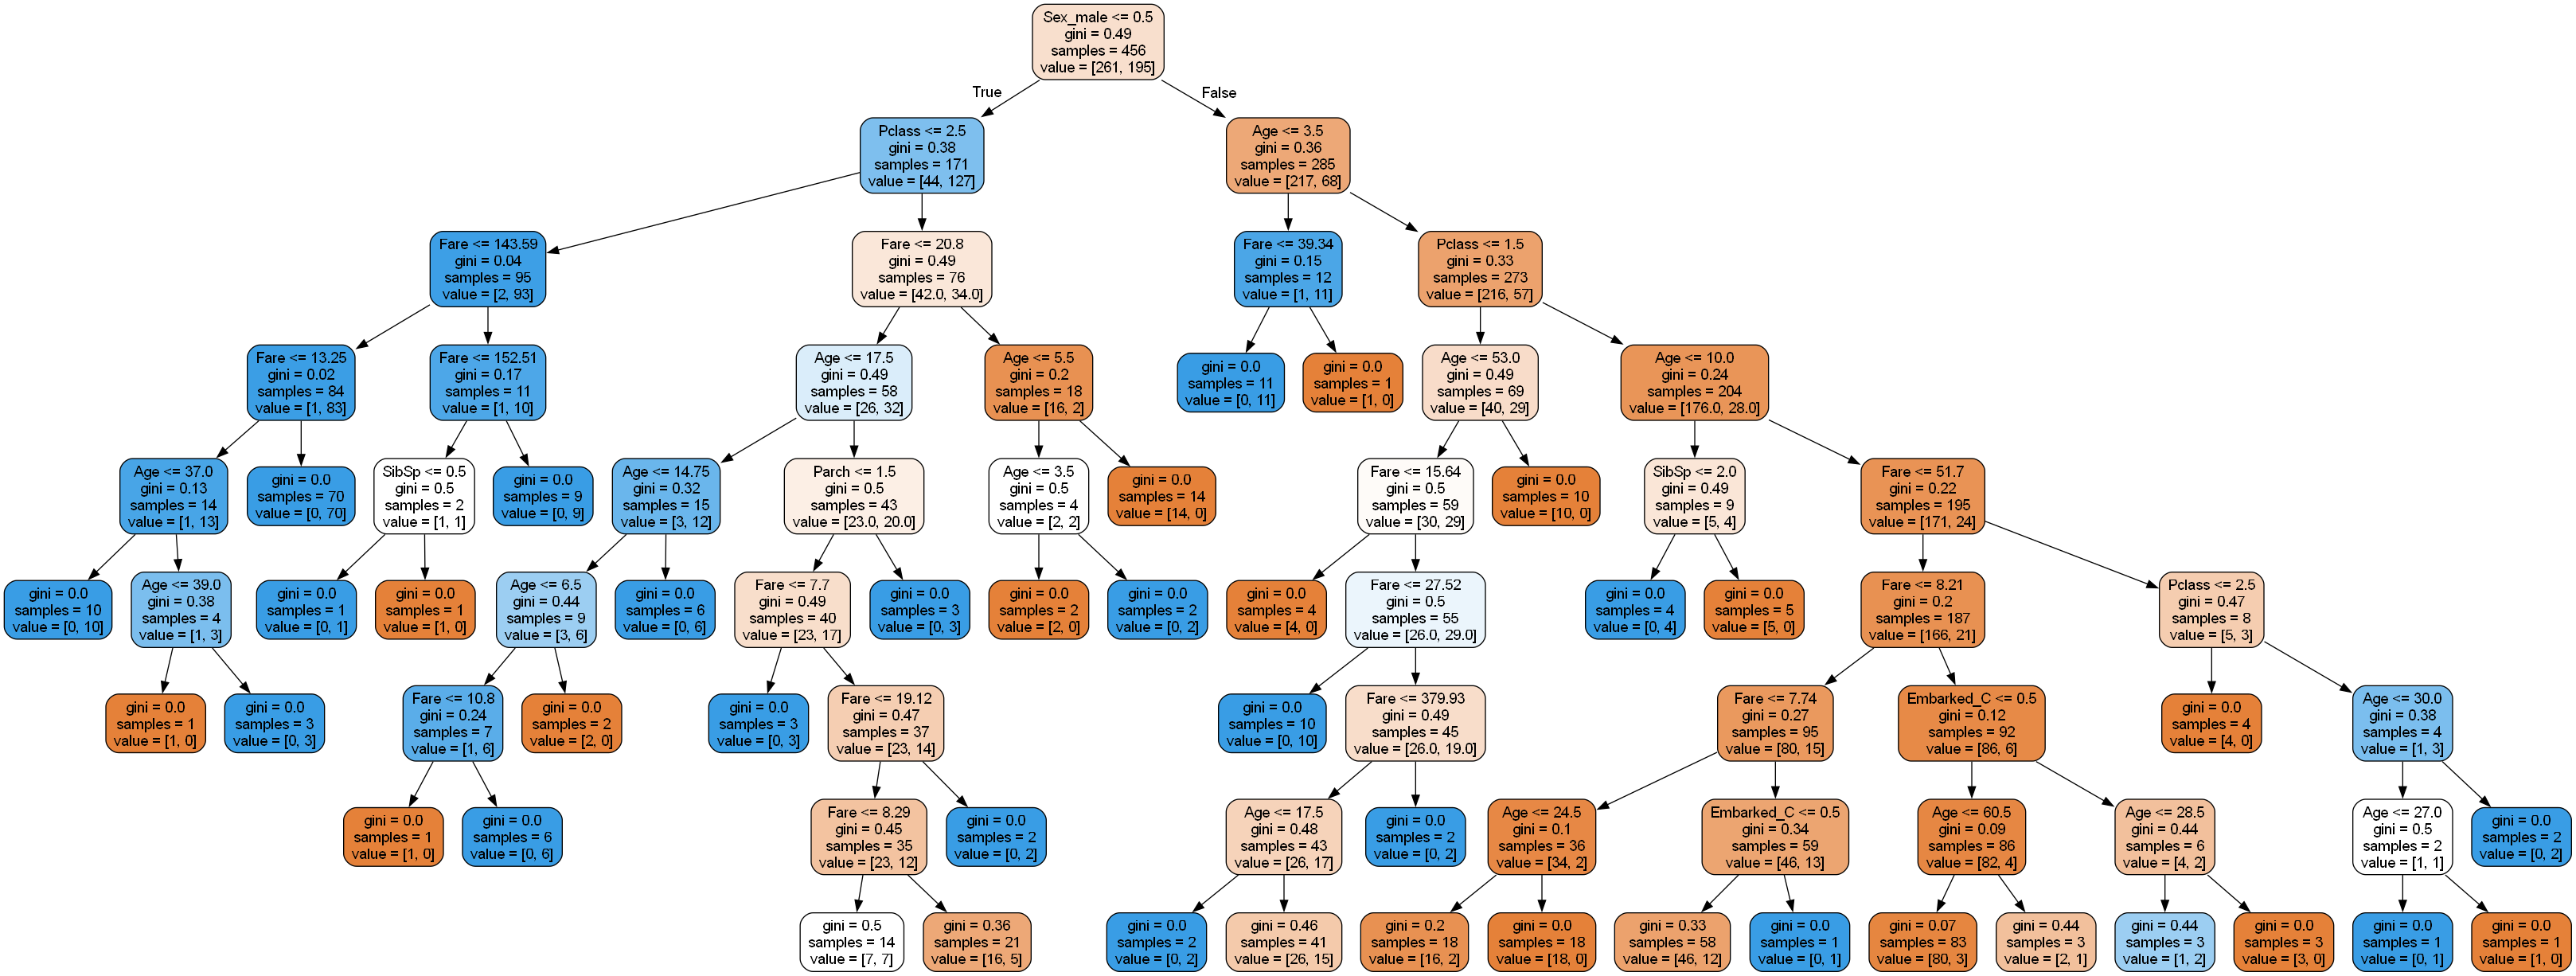

In [28]:
# Choose the current model.
current_model = depth_8

# Computing the performance on the development set.
dev_accuracy_8 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_8 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8434782608695652
Training set accuracy: 0.9144736842105263
At depth: 9


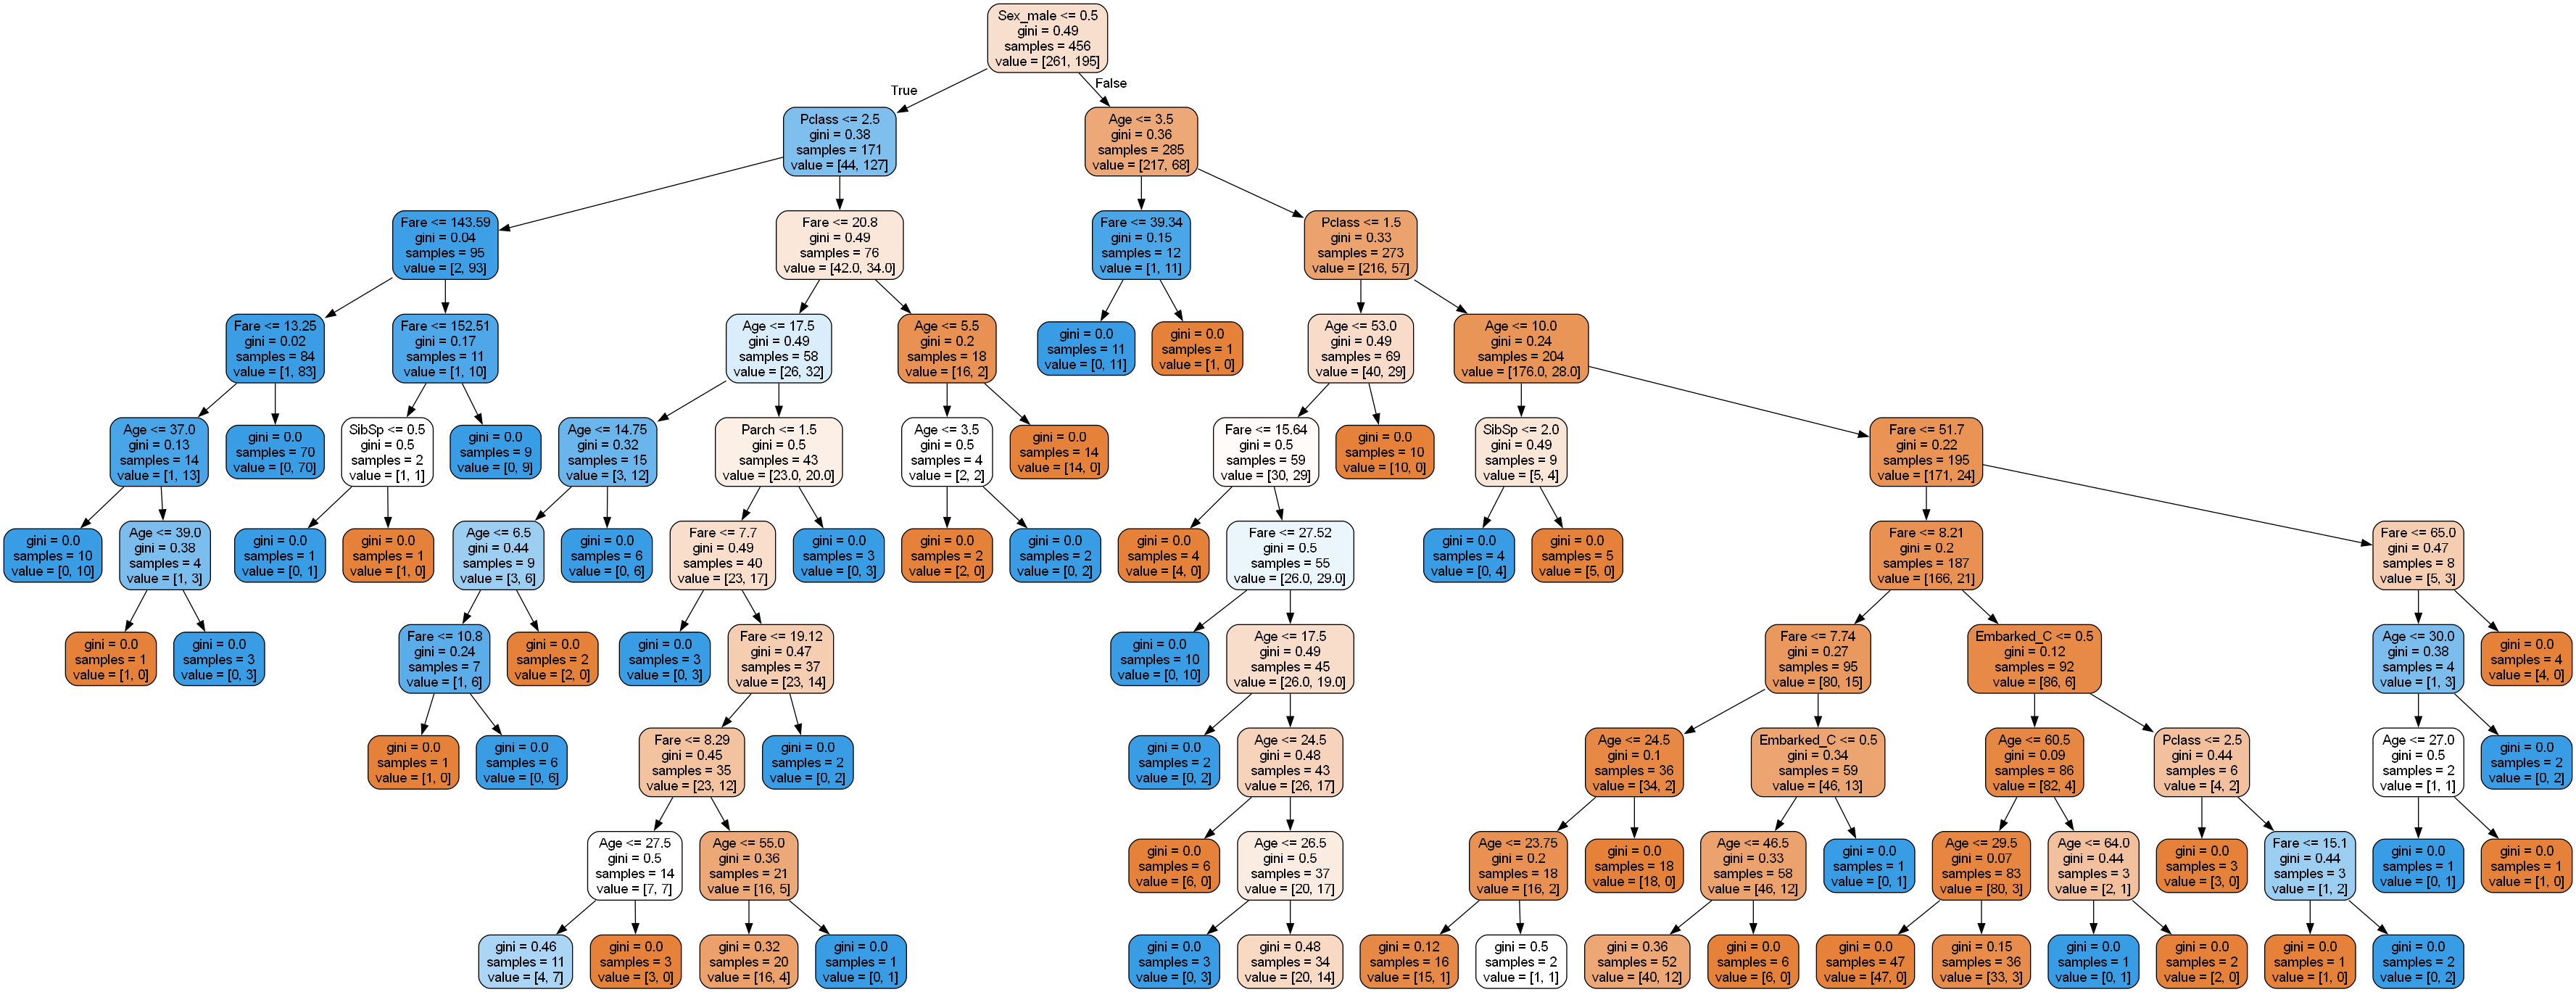

In [29]:
# Choose the current model.
current_model = depth_9

# Computing the performance on the development set.
dev_accuracy_9 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_9 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

Development set accuracy: 0.8173913043478261
Training set accuracy: 0.9276315789473685
At depth: 10


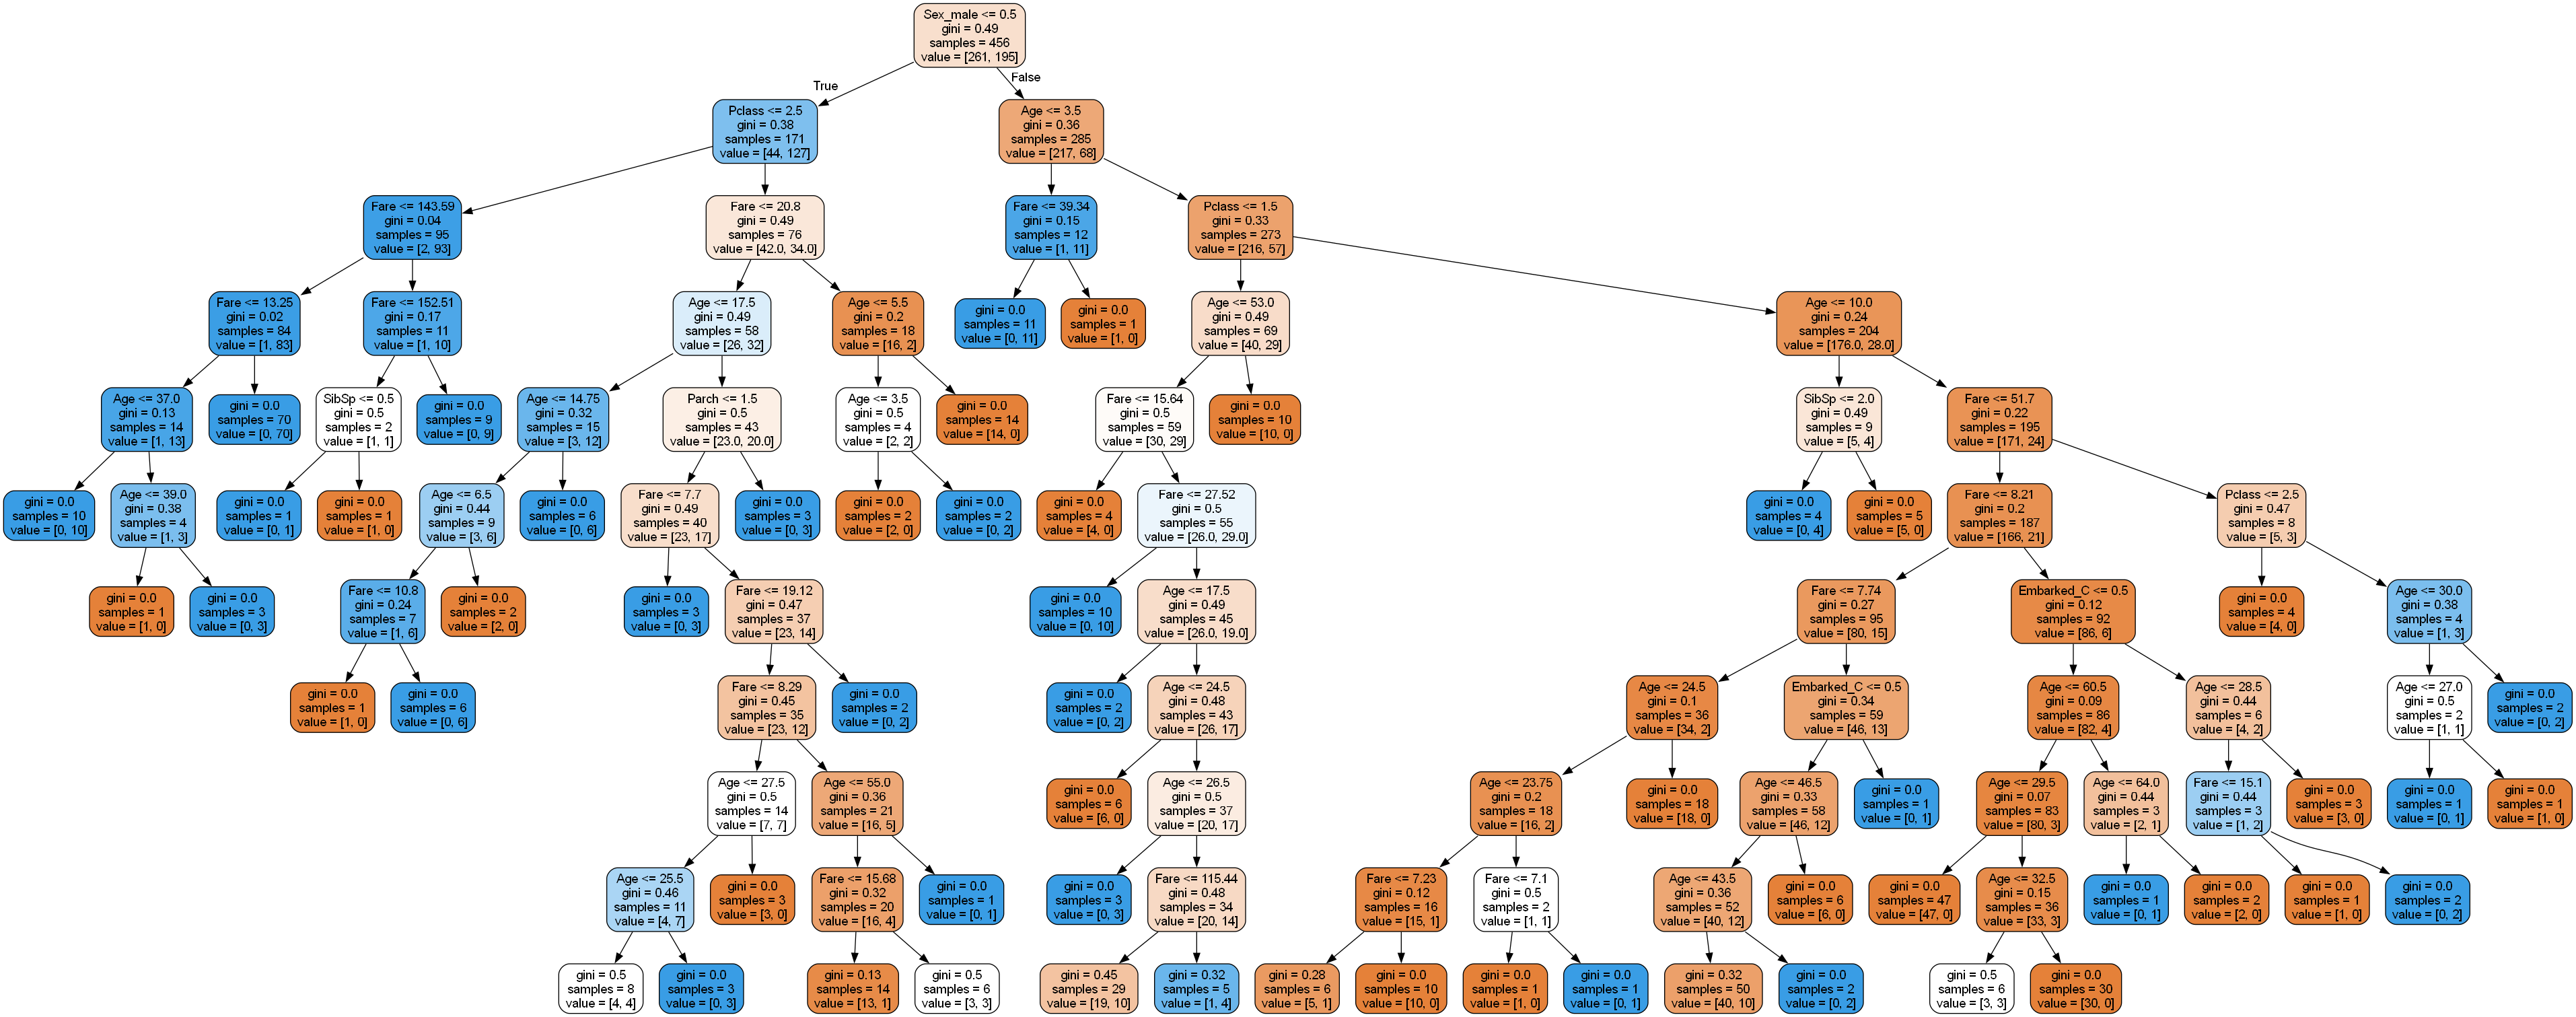

In [30]:
# Choose the current model.
current_model = depth_10

# Computing the performance on the development set.
dev_accuracy_10 = current_model.score(X_dev, y_dev)

# Computing the performance on the training set.
train_accuracy_10 = current_model.score(X_train, y_train)

print("Development set accuracy:", current_model.score(X_dev, y_dev))
print("Training set accuracy:", current_model.score(X_train, y_train))
print("At depth:", current_model.tree_.max_depth)

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)

In [31]:
# Get an overview of the accuracies at the depths.
print('Depth\t Development\t\t Training')
print('2\t', dev_accuracy_2, '\t', train_accuracy_2)
print('3\t', dev_accuracy_3, '\t', train_accuracy_3)
print('4\t', dev_accuracy_4, '\t', train_accuracy_4)
print('5\t', dev_accuracy_5,'\t', train_accuracy_5)
print('6\t', dev_accuracy_6,'\t', train_accuracy_6)
print('7\t', dev_accuracy_7,'\t', train_accuracy_7)
print('8\t', dev_accuracy_8,'\t', train_accuracy_8)
print('9\t', dev_accuracy_9,'\t', train_accuracy_9)
print('10\t', dev_accuracy_10,'\t', train_accuracy_10)


Depth	 Development		 Training
2	 0.8260869565217391 	 0.793859649122807
3	 0.8347826086956521 	 0.8092105263157895
4	 0.8260869565217391 	 0.8157894736842105
5	 0.8347826086956521 	 0.8442982456140351
6	 0.8347826086956521 	 0.8771929824561403
7	 0.8434782608695652 	 0.8881578947368421
8	 0.8347826086956521 	 0.8991228070175439
9	 0.8434782608695652 	 0.9144736842105263
10	 0.8173913043478261 	 0.9276315789473685


The accuracy of the development set is maxed out at depth = 7. Afterwards it plateaus and then drops.

**Plot of Accuracies**

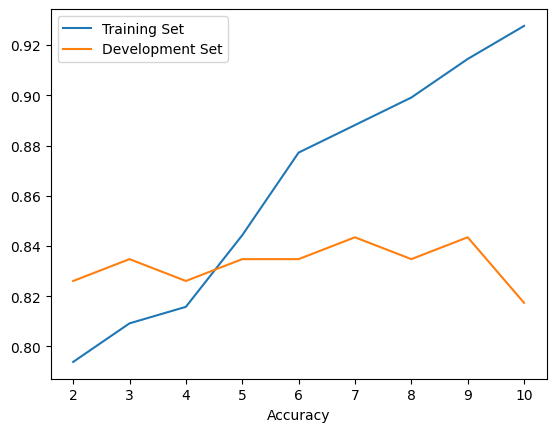

In [32]:
# Plot a line of training accuracies and development accuracies in the same graph.
pruned_depths = range(2, 11)
pruned_scores_train = [] 
pruned_scores_dev = [] 

for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  pruned_scores_train.append(score)

for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_dev, y_dev)
  pruned_scores_dev.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_train, label='Training Set')
ax.plot(pruned_depths, pruned_scores_dev, label='Development Set')
ax.legend()
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)

**Training Set Line**  
The training set accuracy keeps increasing with every added depth.  
The deeper the depth, the more the graph gets fitted. However, there is the danger of over fitting a model, which is why we added the development set.

**Development Set Line**  
The development set line is relatively flat, however, the accuracy seems to be the highest at depth 7 and then it first plateaus and then decreases. I think because of that depth 9 should be ideal. If I choose a lower depth, I may overfit the model.

In [33]:
# Fit best Model

# Training a model.
final_model = DecisionTreeClassifier(max_depth=7, random_state=r)
final_model.fit(X_train, y_train)

# Compute the accuracy. 
final = round(final_model.score(X_test, y_test), 3)
print(f"The accuracy at depth 7 is {final*100}%.")

The accuracy at depth 7 is 82.5%.


This is a relatively good fit.

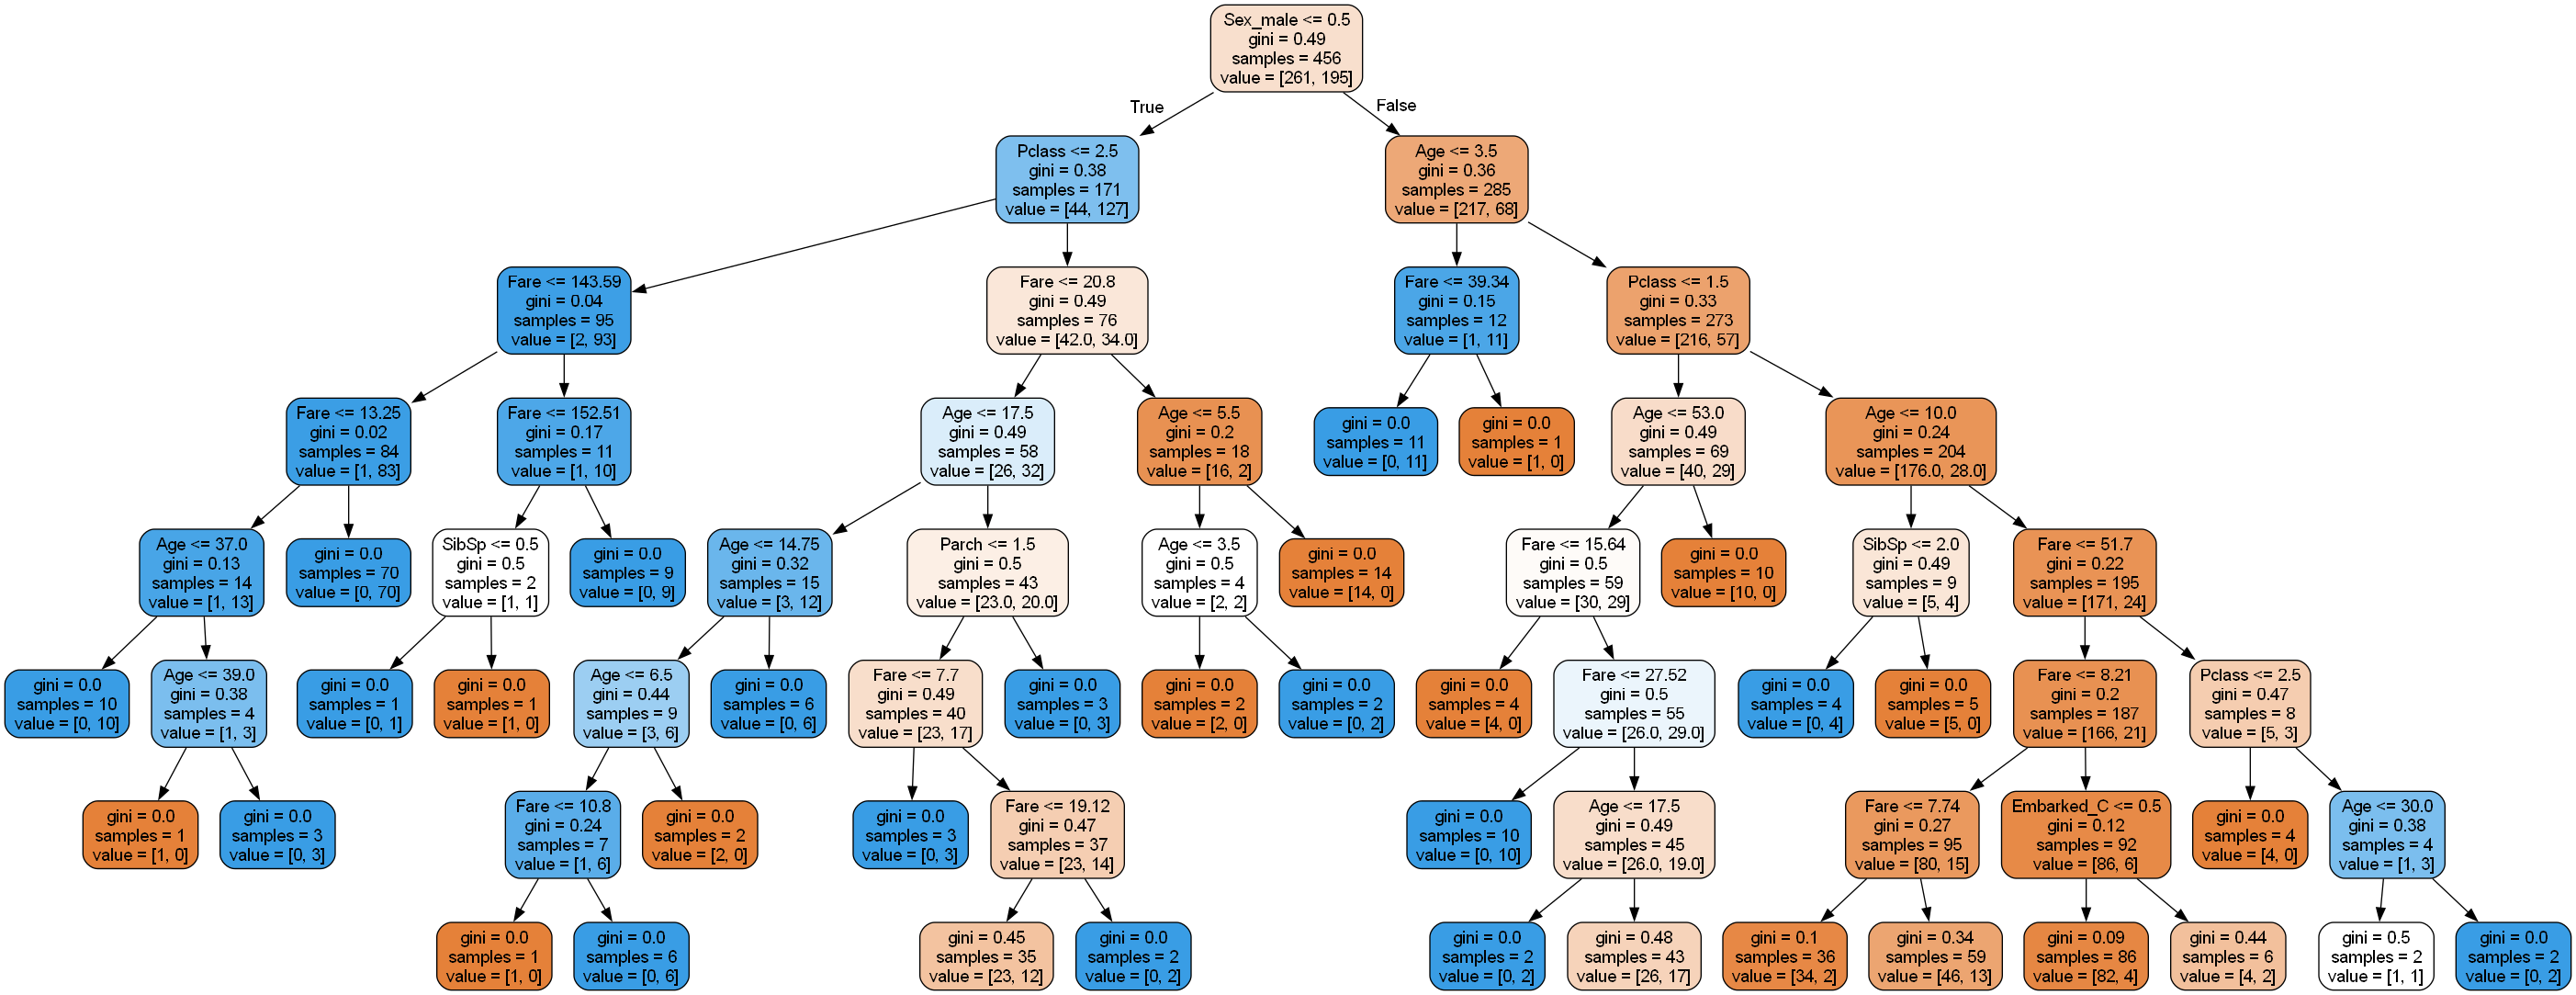

In [34]:
# Reprint the decision tree at the chosen depth.

# Choose depth 9
current_model = depth_7

# Plot the tree.
plot(current_model)
Image(filename = 'model.png', width=1000)